In [1]:
import pandas as pd
import numpy as np

In [2]:
us_data = pd.read_csv('USA_DATA_SQL.csv')
us_data

,date,Consum_Price_index,Avg_House_price,GDP,Home_price_index,Home_ownership_rate,mortage_rate,Unemployment_rate,inventory_index,zillow_index
0,2003-01-01,0.442233,233100.0,11174.129,128.461,68.0,NaN,3.2,120792.0,147458.606076
1,2003-02-01,0.770501,NaN,NaN,129.355,NaN,NaN,3.3,NaN,148240.809836
2,2003-03-01,0.600765,NaN,NaN,130.148,NaN,NaN,3.3,NaN,149022.590076
3,2003-04-01,-0.217155,241000.0,11312.766,130.884,68.0,NaN,3.3,121233.0,149873.699907
4,2003-05-01,-0.163221,NaN,NaN,131.735,NaN,NaN,3.5,NaN,150810.139042
...,...,...,...,...,...,...,...,...,...,...
241,2023-02-01,0.558211,NaN,NaN,297.537,NaN,NaN,1.7,NaN,336736.333170
242,2023-03-01,0.331073,NaN,NaN,298.637,NaN,NaN,1.8,NaN,336675.217719
243,2023-04-01,0.505904,503000.0,27063.012,300.213,65.9,NaN,1.6,145149.0,337633.655693
244,2023-05-01,0.251844,NaN,NaN,302.566,NaN,NaN,1.8,NaN,339249.447863


In [3]:
us_data['date']= pd.to_datetime(us_data['date'])
# Dropping the 'mortage_rate' column from 'us_data'
us_data.drop('mortage_rate', axis=1, inplace=True)

In [4]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 246 non-null    datetime64[ns]
 1   Consum_Price_index   246 non-null    float64       
 2   Avg_House_price      82 non-null     float64       
 3   GDP                  82 non-null     float64       
 4   Home_price_index     246 non-null    float64       
 5   Home_ownership_rate  82 non-null     float64       
 6   Unemployment_rate    246 non-null    float64       
 7   inventory_index      82 non-null     float64       
 8   zillow_index         246 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 17.4 KB


In [5]:
mortage = pd.read_csv('Mortage_excel.csv')
mortage

,date,inflation,mortage_rate
0,02-01-2003,1.64,5.85
1,03-01-2003,1.62,5.85
2,06-01-2003,1.63,5.85
3,07-01-2003,1.62,5.85
4,08-01-2003,1.71,5.85
...,...,...,...
5104,25-05-2023,2.25,6.57
5105,26-05-2023,2.23,6.57
5106,30-05-2023,2.22,6.57
5107,31-05-2023,2.18,6.57


In [6]:
mortage['date'] = pd.to_datetime(mortage['date'],dayfirst=True)
mortage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          5109 non-null   datetime64[ns]
 1   inflation     5109 non-null   float64       
 2   mortage_rate  5109 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 119.9 KB


In [7]:
mortage

,date,inflation,mortage_rate
0,2003-01-02,1.64,5.85
1,2003-01-03,1.62,5.85
2,2003-01-06,1.63,5.85
3,2003-01-07,1.62,5.85
4,2003-01-08,1.71,5.85
...,...,...,...
5104,2023-05-25,2.25,6.57
5105,2023-05-26,2.23,6.57
5106,2023-05-30,2.22,6.57
5107,2023-05-31,2.18,6.57


In [8]:
# Joining 'us_data' and 'mortage' DataFrames based on the 'date' column and using a left join
usa_df = us_data.join(mortage.set_index('date'),how='left',on='date')

In [9]:
print(usa_df.info())
usa_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 246 non-null    datetime64[ns]
 1   Consum_Price_index   246 non-null    float64       
 2   Avg_House_price      82 non-null     float64       
 3   GDP                  82 non-null     float64       
 4   Home_price_index     246 non-null    float64       
 5   Home_ownership_rate  82 non-null     float64       
 6   Unemployment_rate    246 non-null    float64       
 7   inventory_index      82 non-null     float64       
 8   zillow_index         246 non-null    float64       
 9   inflation            159 non-null    float64       
 10  mortage_rate         159 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 21.3 KB
None


date                     0
Consum_Price_index       0
Avg_House_price        164
GDP                    164
Home_price_index         0
Home_ownership_rate    164
Unemployment_rate        0
inventory_index        164
zillow_index             0
inflation               87
mortage_rate            87
dtype: int64

In [10]:
usa_df.shape

(246, 11)

In [11]:
usa_df.head(10)

,date,Consum_Price_index,Avg_House_price,GDP,Home_price_index,Home_ownership_rate,Unemployment_rate,inventory_index,zillow_index,inflation,mortage_rate
0,2003-01-01,0.442233,233100.0,11174.129,128.461,68.0,3.2,120792.0,147458.606076,NaN,NaN
1,2003-02-01,0.770501,NaN,NaN,129.355,NaN,3.3,NaN,148240.809836,NaN,NaN
2,2003-03-01,0.600765,NaN,NaN,130.148,NaN,3.3,NaN,149022.590076,NaN,NaN
3,2003-04-01,-0.217155,241000.0,11312.766,130.884,68.0,3.3,121233.0,149873.699907,1.82,5.91
4,2003-05-01,-0.163221,NaN,NaN,131.735,NaN,3.5,NaN,150810.139042,1.75,5.79
5,2003-06-01,0.108992,NaN,NaN,132.649,NaN,3.4,NaN,151781.607134,NaN,NaN
6,2003-07-01,0.108873,248100.0,11566.669,133.777,68.4,3.4,121682.0,152803.936875,1.64,5.24
7,2003-08-01,0.380642,NaN,NaN,134.969,NaN,3.4,NaN,153889.750099,2.04,6.14
8,2003-09-01,0.325027,NaN,NaN,136.294,NaN,3.4,NaN,155038.700765,NaN,NaN
9,2003-10-01,-0.107991,256000.0,11772.234,137.531,68.6,3.3,122159.0,156198.110739,2.00,5.98


In [12]:
usa_df.fillna(method='ffill', inplace=True)

In [13]:
usa_df.fillna(method='bfill',inplace=True)

In [14]:
usa_df.head(10)

,date,Consum_Price_index,Avg_House_price,GDP,Home_price_index,Home_ownership_rate,Unemployment_rate,inventory_index,zillow_index,inflation,mortage_rate
0,2003-01-01,0.442233,233100.0,11174.129,128.461,68.0,3.2,120792.0,147458.606076,1.82,5.91
1,2003-02-01,0.770501,233100.0,11174.129,129.355,68.0,3.3,120792.0,148240.809836,1.82,5.91
2,2003-03-01,0.600765,233100.0,11174.129,130.148,68.0,3.3,120792.0,149022.590076,1.82,5.91
3,2003-04-01,-0.217155,241000.0,11312.766,130.884,68.0,3.3,121233.0,149873.699907,1.82,5.91
4,2003-05-01,-0.163221,241000.0,11312.766,131.735,68.0,3.5,121233.0,150810.139042,1.75,5.79
5,2003-06-01,0.108992,241000.0,11312.766,132.649,68.0,3.4,121233.0,151781.607134,1.75,5.79
6,2003-07-01,0.108873,248100.0,11566.669,133.777,68.4,3.4,121682.0,152803.936875,1.64,5.24
7,2003-08-01,0.380642,248100.0,11566.669,134.969,68.4,3.4,121682.0,153889.750099,2.04,6.14
8,2003-09-01,0.325027,248100.0,11566.669,136.294,68.4,3.4,121682.0,155038.700765,2.04,6.14
9,2003-10-01,-0.107991,256000.0,11772.234,137.531,68.6,3.3,122159.0,156198.110739,2.00,5.98


In [15]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 246 non-null    datetime64[ns]
 1   Consum_Price_index   246 non-null    float64       
 2   Avg_House_price      246 non-null    float64       
 3   GDP                  246 non-null    float64       
 4   Home_price_index     246 non-null    float64       
 5   Home_ownership_rate  246 non-null    float64       
 6   Unemployment_rate    246 non-null    float64       
 7   inventory_index      246 non-null    float64       
 8   zillow_index         246 non-null    float64       
 9   inflation            246 non-null    float64       
 10  mortage_rate         246 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 21.3 KB


In [16]:
population = pd.read_csv('Population.csv')
population.head()

,DATE,POPTHM
0,2003-01-01,289412.0
1,2003-02-01,289606.0
2,2003-03-01,289809.0
3,2003-04-01,290024.0
4,2003-05-01,290250.0


In [17]:
population['DATE'] = pd.to_datetime(population['DATE'])
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    250 non-null    datetime64[ns]
 1   POPTHM  250 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [18]:
# Joining 'us_data' and 'population' DataFrames based on the 'date' column and using a left join
usa_df = usa_df.join(population.set_index('DATE'),how='left',on='date')
usa_df['Consumer_Price_index'] = usa_df['Consum_Price_index']
usa_df.head()

,date,Consum_Price_index,Avg_House_price,GDP,Home_price_index,Home_ownership_rate,Unemployment_rate,inventory_index,zillow_index,inflation,mortage_rate,POPTHM,Consumer_Price_index
0,2003-01-01,0.442233,233100.0,11174.129,128.461,68.0,3.2,120792.0,147458.606076,1.82,5.91,289412.0,0.442233
1,2003-02-01,0.770501,233100.0,11174.129,129.355,68.0,3.3,120792.0,148240.809836,1.82,5.91,289606.0,0.770501
2,2003-03-01,0.600765,233100.0,11174.129,130.148,68.0,3.3,120792.0,149022.590076,1.82,5.91,289809.0,0.600765
3,2003-04-01,-0.217155,241000.0,11312.766,130.884,68.0,3.3,121233.0,149873.699907,1.82,5.91,290024.0,-0.217155
4,2003-05-01,-0.163221,241000.0,11312.766,131.735,68.0,3.5,121233.0,150810.139042,1.75,5.79,290250.0,-0.163221


In [19]:
usa_df['Population'] = usa_df['POPTHM']

In [21]:
usa_df.drop('Consum_Price_index', axis=1, inplace=True)
usa_df.drop('POPTHM', axis=1, inplace=True)
print(usa_df.shape)
usa_df.head()

(246, 12)


,date,Avg_House_price,GDP,Home_price_index,Home_ownership_rate,Unemployment_rate,inventory_index,zillow_index,inflation,mortage_rate,Consumer_Price_index,Population
0,2003-01-01,233100.0,11174.129,128.461,68.0,3.2,120792.0,147458.606076,1.82,5.91,0.442233,289412.0
1,2003-02-01,233100.0,11174.129,129.355,68.0,3.3,120792.0,148240.809836,1.82,5.91,0.770501,289606.0
2,2003-03-01,233100.0,11174.129,130.148,68.0,3.3,120792.0,149022.590076,1.82,5.91,0.600765,289809.0
3,2003-04-01,241000.0,11312.766,130.884,68.0,3.3,121233.0,149873.699907,1.82,5.91,-0.217155,290024.0
4,2003-05-01,241000.0,11312.766,131.735,68.0,3.5,121233.0,150810.139042,1.75,5.79,-0.163221,290250.0


In [51]:
print('Dimentions',usa_df.shape)
usa_df.info()

Dimentions (246, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  246 non-null    datetime64[ns]
 1   Avg_House_price       246 non-null    float64       
 2   GDP                   246 non-null    float64       
 3   Home_price_index      246 non-null    float64       
 4   Home_ownership_rate   246 non-null    float64       
 5   Unemployment_rate     246 non-null    float64       
 6   inventory_index       246 non-null    float64       
 7   zillow_index          246 non-null    float64       
 8   inflation             246 non-null    float64       
 9   mortage_rate          246 non-null    float64       
 10  Consumer_Price_index  246 non-null    float64       
 11  Population            246 non-null    float64       
 12  year                  246 non-null    int64         
 13 

In [52]:
usa_df.describe()

,Avg_House_price,GDP,Home_price_index,Home_ownership_rate,Unemployment_rate,inventory_index,zillow_index,inflation,mortage_rate,Consumer_Price_index,Population,year,month
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,339530.487805,17495.720110,183.570378,66.195122,3.281707,133586.695122,206254.501529,2.079228,4.742642,0.213525,315306.085366,2012.756098,6.426829
std,75093.717266,4048.612309,44.735343,1.818874,1.668077,6160.935760,49825.784139,0.424662,1.128842,0.403309,13898.059542,5.933429,3.458313
min,233100.000000,11174.129000,128.461000,62.900000,1.500000,120792.000000,147458.606076,0.340000,2.720000,-1.915290,289412.000000,2003.000000,1.000000
25%,278000.000000,14448.882000,148.209000,64.800000,2.200000,129968.000000,169911.037078,1.810000,3.855000,-0.032939,303547.250000,2008.000000,3.000000
50%,321250.000000,16688.438000,173.480000,65.900000,2.700000,133321.000000,193681.793015,2.150000,4.485000,0.210638,316446.000000,2013.000000,6.000000
75%,376700.000000,20328.553000,201.233250,67.900000,4.100000,138203.000000,224932.181612,2.370000,5.880000,0.479870,328481.750000,2018.000000,9.000000
max,552600.000000,27063.012000,304.724000,69.200000,13.200000,145149.000000,343150.679128,2.800000,7.080000,1.373608,335163.000000,2023.000000,12.000000


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# usa_df.to_csv("Home_LLC DATA")

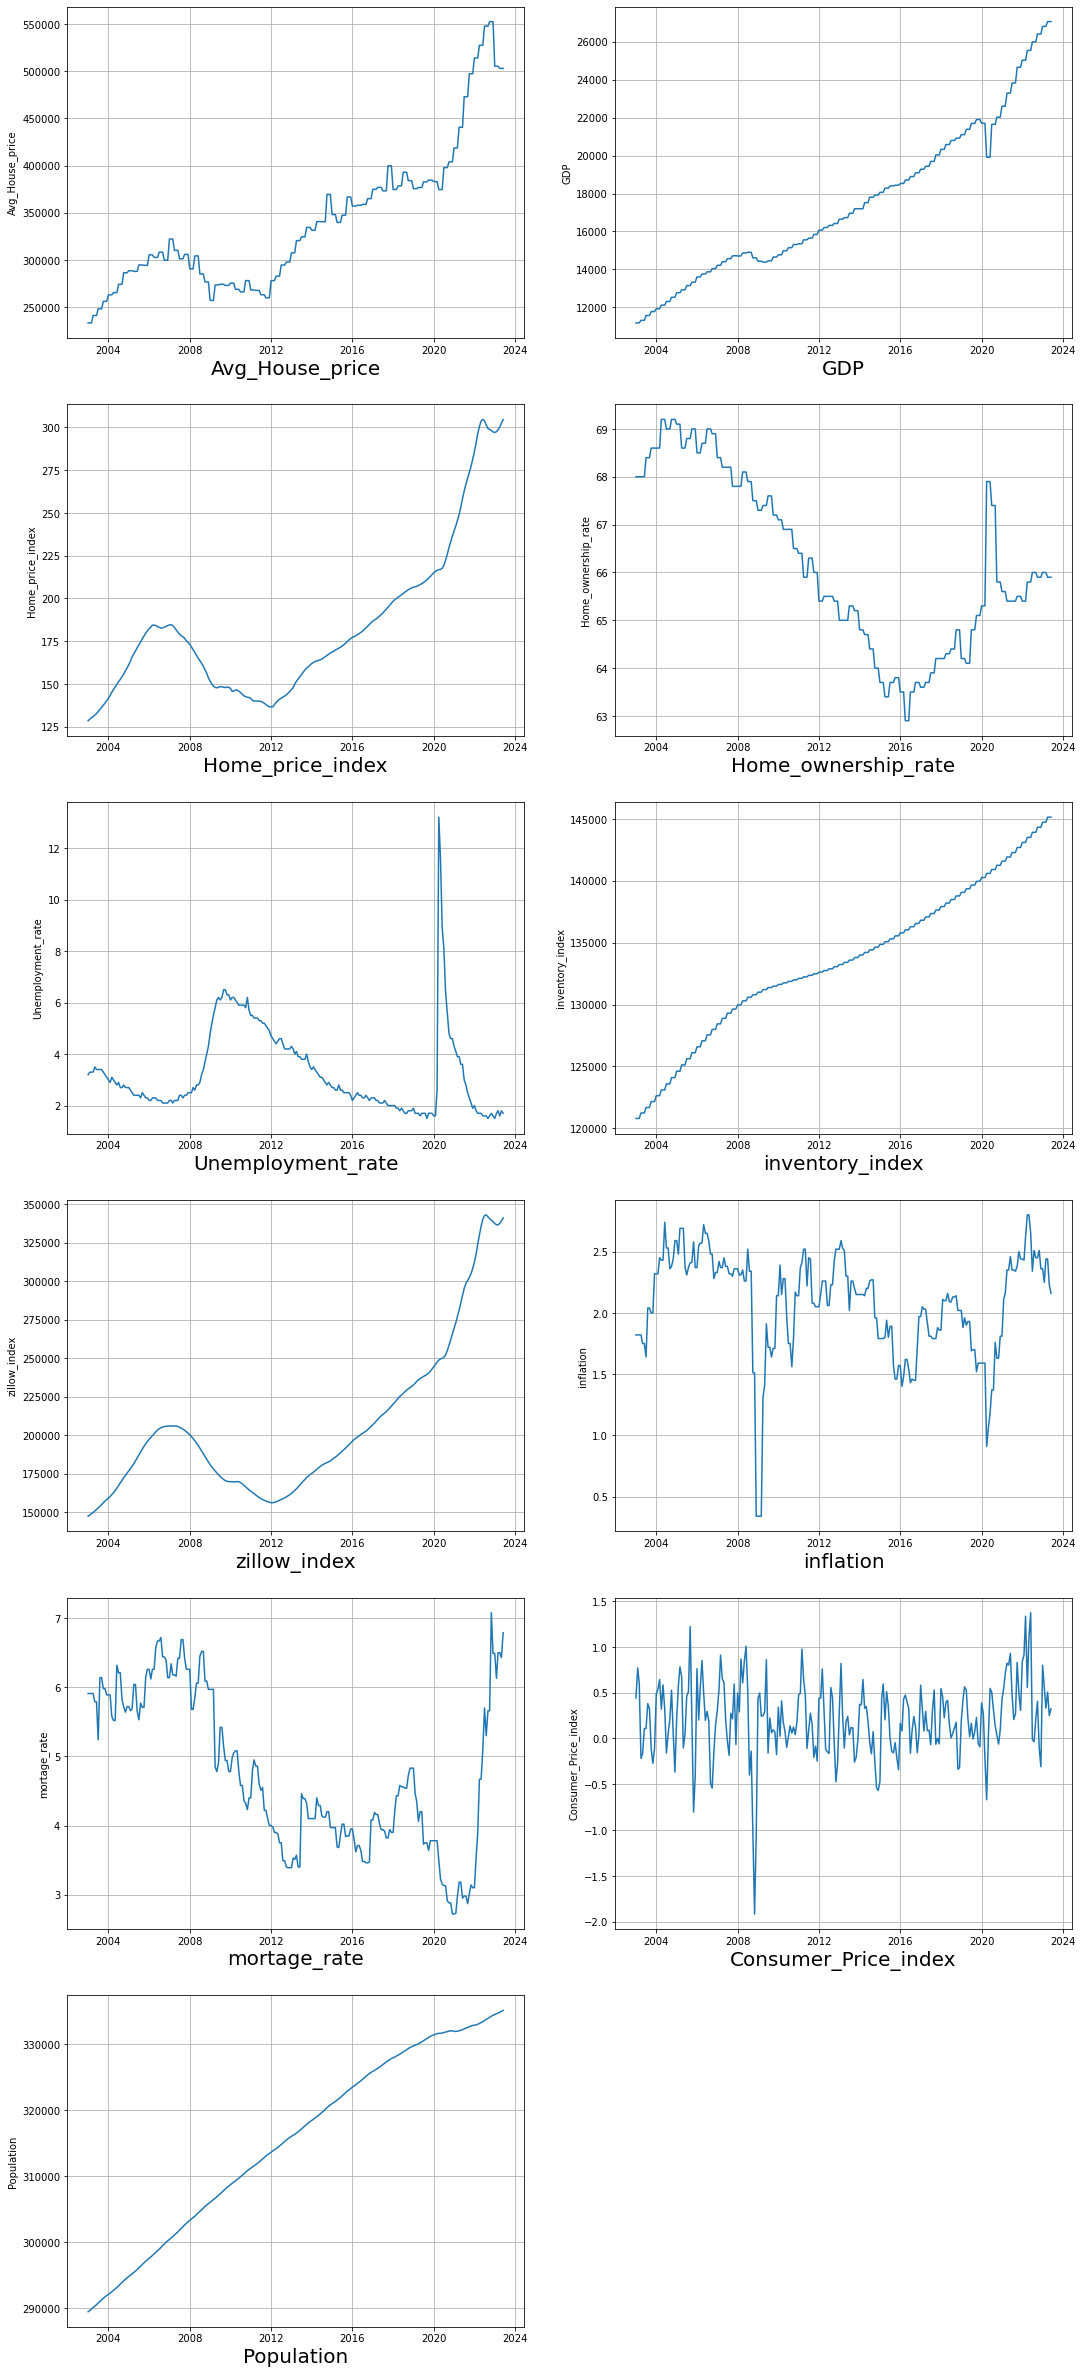

In [24]:
plt.figure(figsize=(18,50),)
plotnumber = 1
for i in usa_df.drop('date', axis=1):
    if plotnumber<=14:
        
        ax = plt.subplot(7,2,plotnumber)
        sns.lineplot(x=usa_df['date'],y=usa_df[i])
        plt.grid(True)
        plt.xlabel(i,fontsize=20)
    plotnumber += 1
    
plt.show()

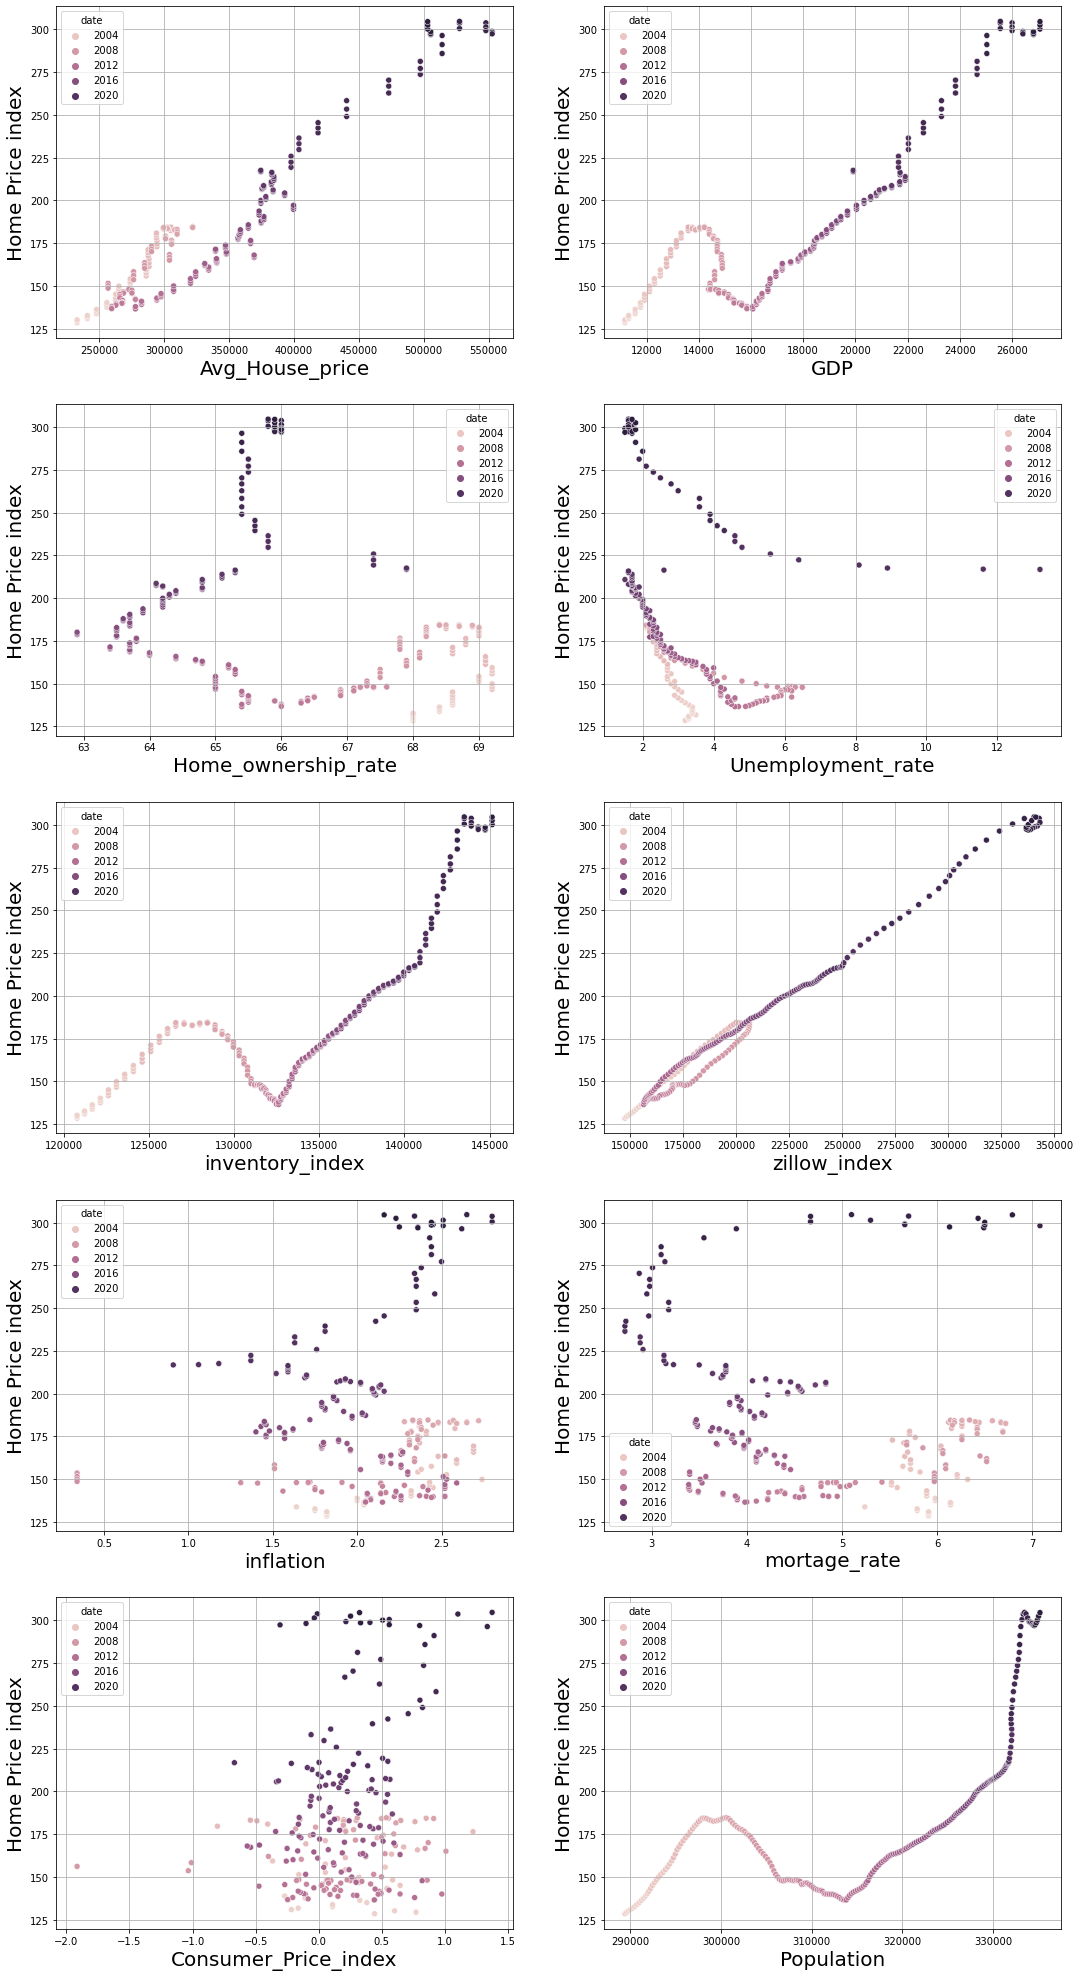

In [25]:
plt.figure(figsize=(18,50),)
plotnumber = 1
for i in usa_df.drop(columns=['date','Home_price_index'], axis=1):
    if plotnumber<=14:
        
        ax = plt.subplot(7,2,plotnumber)
        sns.scatterplot(y=usa_df['Home_price_index'],x=usa_df[i],hue=usa_df['date'].dt.year)
        plt.grid(True)
        plt.ylabel('Home Price index',fontsize=20)
        plt.xlabel(i,fontsize=20)
    plotnumber += 1
    
plt.show()

In [26]:
usa_df['year'] = usa_df['date'].dt.year
usa_df['month'] = usa_df['date'].dt.month

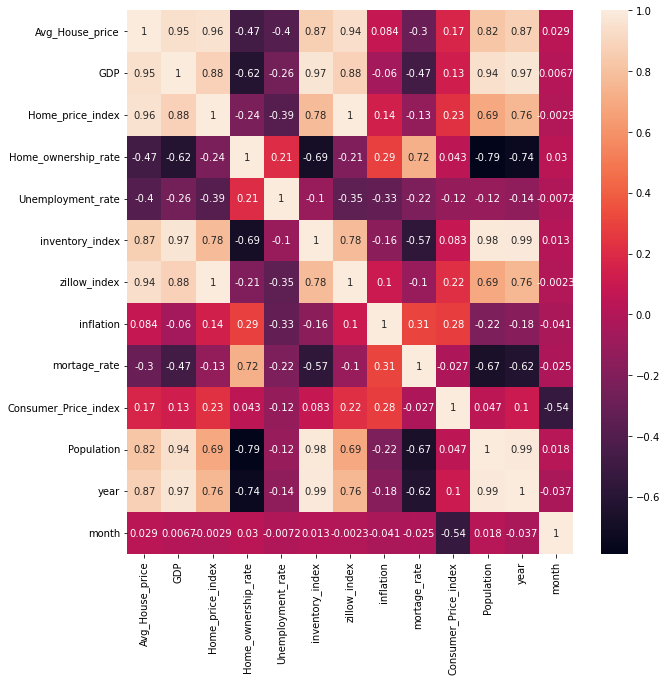

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(usa_df.corr(),annot=True)
plt.show()

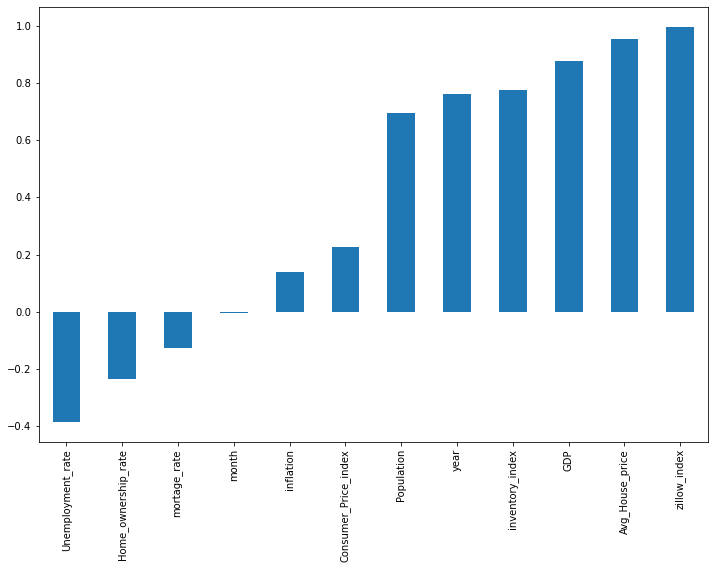

In [28]:
plt.figure(figsize=(12,8))
usa_df.corr()["Home_price_index"].sort_values().drop(["Home_price_index"]).plot(kind = "bar")
plt.show()

In [53]:
print(usa_df.corr()["Home_price_index"].sort_values().drop(["Home_price_index"]))

Unemployment_rate      -0.386135
Home_ownership_rate    -0.235359
mortage_rate           -0.125439
month                  -0.002913
inflation               0.138884
Consumer_Price_index    0.226616
Population              0.694052
year                    0.762067
inventory_index         0.776357
GDP                     0.878406
Avg_House_price         0.955185
zillow_index            0.995906
Name: Home_price_index, dtype: float64


In [29]:
x = usa_df.drop(columns=['Home_price_index','date'],axis=1)
y = usa_df['Home_price_index']

In [30]:
x.head()

,Avg_House_price,GDP,Home_ownership_rate,Unemployment_rate,inventory_index,zillow_index,inflation,mortage_rate,Consumer_Price_index,Population,year,month
0,233100.0,11174.129,68.0,3.2,120792.0,147458.606076,1.82,5.91,0.442233,289412.0,2003,1
1,233100.0,11174.129,68.0,3.3,120792.0,148240.809836,1.82,5.91,0.770501,289606.0,2003,2
2,233100.0,11174.129,68.0,3.3,120792.0,149022.590076,1.82,5.91,0.600765,289809.0,2003,3
3,241000.0,11312.766,68.0,3.3,121233.0,149873.699907,1.82,5.91,-0.217155,290024.0,2003,4
4,241000.0,11312.766,68.0,3.5,121233.0,150810.139042,1.75,5.79,-0.163221,290250.0,2003,5


In [31]:
# Importing the StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creating an instance of StandardScaler
scaler = StandardScaler()

# Fitting the scaler instance to the data and transforming the data
x_scaled = scaler.fit_transform(x)

# Create DataFrame to save VIF values
vif = pd.DataFrame()

# Calculating the VIF for feature
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

# Adding feature names to the DataFrame
vif["Features"] = x.columns

# Sorting the DataFrame by VIF in descending order
vif.sort_values('vif',ascending=False)

,vif,Features
10,5582.905071,year
9,3664.023055,Population
1,951.899838,GDP
4,330.537769,inventory_index
5,91.096169,zillow_index
0,42.709297,Avg_House_price
2,21.347750,Home_ownership_rate
11,16.590669,month
3,11.829162,Unemployment_rate
7,8.043525,mortage_rate


In [32]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=18)

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Create instances of the regression models
linear_regression_model = LinearRegression()
ridge_regression_model = Ridge()
lasso_regression_model = Lasso()
elastic_net_model = ElasticNet()
decision_tree_regressor_model = DecisionTreeRegressor()
random_forest_regressor_model = RandomForestRegressor()
k_neighbors_regressor_model = KNeighborsRegressor()

# You can create a dictionary to store the models
regression_models = {
    "Linear Regression": linear_regression_model,
    "Ridge Regression": ridge_regression_model,
    "Lasso Regression": lasso_regression_model,
    "Elastic Net": elastic_net_model,
    "Decision Tree Regressor": decision_tree_regressor_model,
    "Random Forest Regressor": random_forest_regressor_model,
    "KNN Model":k_neighbors_regressor_model}



In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_predict

In [35]:
results = []
# Loop through each model
for model_name, model in regression_models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions for train data
    y_pred_train = model.predict(X_train)
    

    # Evaluate the model
    mae_train = mean_absolute_error(y_train,y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Make predictions for test data
    y_pred_test = model.predict(X_test)

    # Evaluate the model
    mae_test = mean_absolute_error(y_test,y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    results.append({
        "Model": model_name,
        "MSE Train": mse_train,
        "R2 Score Train": r2_train,
        "MAE Train": mae_train,
        "MSE Test": mse_test,
        "R2 Score Test": r2_test,
        "MAE Test": mae_test,
        "CV_Score": np.mean(cv_scores)
    })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

                     Model  MSE Train  R2 Score Train  MAE Train   MSE Test  \
0        Linear Regression   5.128700        0.997523   1.716588   5.909237   
1         Ridge Regression   6.203073        0.997004   1.860886   7.714368   
2         Lasso Regression  10.070173        0.995136   2.443181   7.947971   
3              Elastic Net  90.249051        0.956412   7.794727  92.262246   
4  Decision Tree Regressor   0.000000        1.000000   0.000000   4.558036   
5  Random Forest Regressor   0.414679        0.999800   0.476993   1.930133   
6                KNN Model  18.215202        0.991202   3.380989  19.647883   

   R2 Score Test  MAE Test  CV_Score  
0       0.996322  1.879435  0.997005  
1       0.995198  2.071351  0.996324  
2       0.995053  2.272569  0.994648  
3       0.942571  7.800826  0.954221  
4       0.997163  1.612000  0.995332  
5       0.998799  1.076937  0.997476  
6       0.987770  3.438648  0.977243  


In [36]:
results_df

,Model,MSE Train,R2 Score Train,MAE Train,MSE Test,R2 Score Test,MAE Test,CV_Score
0,Linear Regression,5.128700,0.997523,1.716588,5.909237,0.996322,1.879435,0.997005
1,Ridge Regression,6.203073,0.997004,1.860886,7.714368,0.995198,2.071351,0.996324
2,Lasso Regression,10.070173,0.995136,2.443181,7.947971,0.995053,2.272569,0.994648
3,Elastic Net,90.249051,0.956412,7.794727,92.262246,0.942571,7.800826,0.954221
4,Decision Tree Regressor,0.000000,1.000000,0.000000,4.558036,0.997163,1.612000,0.995332
5,Random Forest Regressor,0.414679,0.999800,0.476993,1.930133,0.998799,1.076937,0.997476
6,KNN Model,18.215202,0.991202,3.380989,19.647883,0.987770,3.438648,0.977243


In [37]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 250, 300],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=random_forest_regressor_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [38]:
final_model = RandomForestRegressor(bootstrap=True, max_depth=20, min_samples_leaf=1,
                                    min_samples_split=2, n_estimators=100, n_jobs=-1)

In [39]:
# Fitting the model
final_model.fit(X_train, y_train)

# Making predictions for train data
y_train_pred = final_model.predict(X_train)
    

# Evaluate the model
mae_train = mean_absolute_error(y_train,y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
    
# Make predictions for test data
y_test_pred = model.predict(X_test)

# Evaluate the model
mae_test = mean_absolute_error(y_test,y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

results = {"Model": "Final model",
        "MSE Train": mse_train,  
        "R2 Score Train": r2_train,
        "MAE Train": mae_train,
        "MSE Test": mse_test,
        "R2 Score Test": r2_test,
        "MAE Test": mae_test,}

<AxesSubplot:xlabel='Home_price_index'>

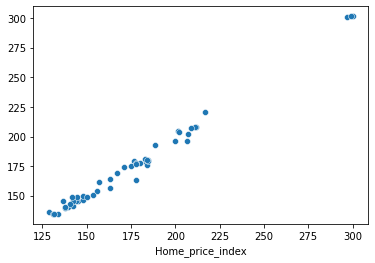

In [41]:
sns.scatterplot(x=y_test,y=y_test_pred)

In [42]:
results

{'Model': 'Final model',
 'MSE Train': 0.4599491097765046,
 'R2 Score Train': 0.9997778539995211,
 'MAE Train': 0.5008132653060944,
 'MSE Test': 19.64788289759997,
 'R2 Score Test': 0.9877699942734672,
 'MAE Test': 3.438647999999995}

In [43]:
import joblib
# Saving model file using joblib
joblib.dump(final_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [44]:
# x.to_csv("Model_data")

In [45]:
import joblib

# Load the model from the file
loaded_model = joblib.load('random_forest_model.joblib')

Avg_House_price = float(input('Avg_House_price: '))        
GDP = float(input('GDP:'))                    
Home_ownership_rate = float(input('Home_ownership_rate: '))    
Unemployment_rate = float(input('Unemployment_rate: '))      
inventory_index = float(input('inventory_index: '))        
zillow_index = float(input('zillow_index: '))           
inflation = float(input('inflation: '))              
mortage_rate = float(input('mortage_rate: '))           
Consumer_Price_index = float(input('Consumer_Price_index: '))   
Population = float(input('Population: '))             
year = float(input('year: '))                   
month = float(input('month: '))

import numpy as np
import pandas as pd
data = np.array([Avg_House_price,GDP,Home_ownership_rate,Unemployment_rate,
       inventory_index, zillow_index, inflation, mortage_rate,
       Consumer_Price_index, Population, year, month])
print(data)



Avg_House_price: 233100
GDP:11174
Home_ownership_rate: 68
Unemployment_rate: 3.5
inventory_index: 121233
zillow_index: 150810
inflation: 1.75
mortage_rate: 6
Consumer_Price_index: 0.22
Population: 290250
year: 2003
month: 6
[2.33100e+05 1.11740e+04 6.80000e+01 3.50000e+00 1.21233e+05 1.50810e+05
 1.75000e+00 6.00000e+00 2.20000e-01 2.90250e+05 2.00300e+03 6.00000e+00]


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def predict_model(data):
    data_2d = data.reshape(1, -1)
    scaled_data = scaler.fit_transform(data_2d)
    prediction = loaded_model.predict(scaled_data)
    print(f'prediction: {prediction}')
    
    return prediction


In [47]:
predict_model(data)

prediction: [171.04712]


array([171.04712])

In [ ]:
=